In [52]:
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Input,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [53]:
data = np.loadtxt('../dataset1/handtrain.csv', delimiter=',')

angle = data[:,:-1].astype(np.float32)
label = data[:, -1].astype(np.float32)

print(angle.shape, label.shape)

(1296, 15) (1296,)


In [54]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_label = ohe.fit_transform(label.reshape(-1, 1)).toarray()
encoded_label = encoded_label.astype(np.float32)

print(encoded_label.shape)

(1296, 26)


In [55]:
ohe.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32)]

In [56]:
input = Input(shape=(15,))

x = Dense(32, activation='relu')(input)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)

x = Dense(32, activation='relu')(x)

output = Dense(26, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_16 (Dense)            (None, 32)                512       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                           

In [57]:
history=model.fit(angle, encoded_label, epochs=400)
history.history.keys()

Epoch 1/400
41/41 [==============================] - 2s 4ms/step - loss: 3.0730 - acc: 0.1204
Epoch 2/400
41/41 [==============================] - 0s 4ms/step - loss: 2.4653 - acc: 0.2654
Epoch 3/400
41/41 [==============================] - 0s 4ms/step - loss: 1.9814 - acc: 0.3804
Epoch 4/400
41/41 [==============================] - 0s 4ms/step - loss: 1.6794 - acc: 0.4583
Epoch 5/400
41/41 [==============================] - 0s 4ms/step - loss: 1.5579 - acc: 0.4699
Epoch 6/400
41/41 [==============================] - 0s 4ms/step - loss: 1.4442 - acc: 0.5131
Epoch 7/400
41/41 [==============================] - 0s 4ms/step - loss: 1.2826 - acc: 0.5432
Epoch 8/400
41/41 [==============================] - 0s 4ms/step - loss: 1.2934 - acc: 0.5563
Epoch 9/400
41/41 [==============================] - 0s 4ms/step - loss: 1.1741 - acc: 0.6042
Epoch 10/400
41/41 [==============================] - 0s 4ms/step - loss: 1.1380 - acc: 0.6142
Epoch 11/400
41/41 [==============================] - 0s 4m

41/41 [==============================] - 0s 4ms/step - loss: 0.4927 - acc: 0.8248
Epoch 88/400
41/41 [==============================] - 0s 4ms/step - loss: 0.5500 - acc: 0.8248
Epoch 89/400
41/41 [==============================] - 0s 4ms/step - loss: 0.5411 - acc: 0.8125
Epoch 90/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4751 - acc: 0.8341
Epoch 91/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4820 - acc: 0.8364
Epoch 92/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4918 - acc: 0.8426
Epoch 93/400
41/41 [==============================] - 0s 4ms/step - loss: 0.5212 - acc: 0.8187
Epoch 94/400
41/41 [==============================] - 0s 4ms/step - loss: 0.5046 - acc: 0.8295
Epoch 95/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4968 - acc: 0.8356
Epoch 96/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4975 - acc: 0.8326
Epoch 97/400
41/41 [==============================] - 0s 4ms/st

41/41 [==============================] - 0s 4ms/step - loss: 0.4119 - acc: 0.8765
Epoch 173/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4140 - acc: 0.8588
Epoch 174/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3601 - acc: 0.8866
Epoch 175/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4271 - acc: 0.8634
Epoch 176/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3835 - acc: 0.8789
Epoch 177/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3867 - acc: 0.8665
Epoch 178/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4208 - acc: 0.8627
Epoch 179/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3747 - acc: 0.8750
Epoch 180/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3873 - acc: 0.8735
Epoch 181/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4454 - acc: 0.8596
Epoch 182/400
41/41 [==============================] -

41/41 [==============================] - 0s 4ms/step - loss: 0.3711 - acc: 0.8696
Epoch 258/400
41/41 [==============================] - 0s 4ms/step - loss: 0.4019 - acc: 0.8765
Epoch 259/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3168 - acc: 0.8966
Epoch 260/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3324 - acc: 0.8904
Epoch 261/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3334 - acc: 0.8889
Epoch 262/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3600 - acc: 0.8812
Epoch 263/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3500 - acc: 0.8873
Epoch 264/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3311 - acc: 0.8958
Epoch 265/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3555 - acc: 0.8858
Epoch 266/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3700 - acc: 0.8889
Epoch 267/400
41/41 [==============================] -

41/41 [==============================] - 0s 4ms/step - loss: 0.2867 - acc: 0.9051
Epoch 343/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3318 - acc: 0.8927
Epoch 344/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3087 - acc: 0.9028
Epoch 345/400
41/41 [==============================] - 0s 4ms/step - loss: 0.2826 - acc: 0.9066
Epoch 346/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3822 - acc: 0.8881
Epoch 347/400
41/41 [==============================] - 0s 4ms/step - loss: 0.2836 - acc: 0.9066
Epoch 348/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3059 - acc: 0.8912
Epoch 349/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3445 - acc: 0.8873
Epoch 350/400
41/41 [==============================] - 0s 4ms/step - loss: 0.3336 - acc: 0.9005
Epoch 351/400
41/41 [==============================] - 0s 4ms/step - loss: 0.2897 - acc: 0.9082
Epoch 352/400
41/41 [==============================] -

dict_keys(['loss', 'acc'])

In [58]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

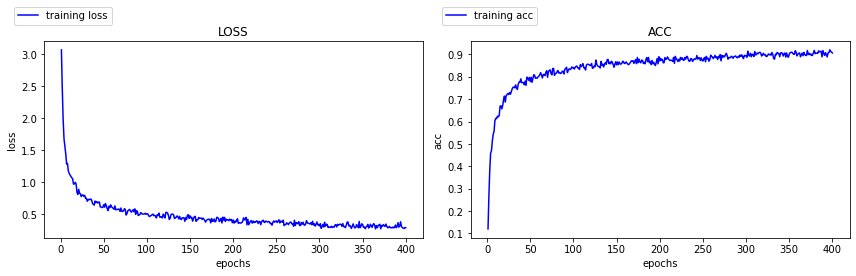

In [59]:
plot_history(history)

In [61]:
# print(history.history['loss'])
print(history.history['acc'][396])


0.9205247163772583


In [63]:
model.save('handtrain(400(92)).h5')